In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import re
import string
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:

data = pd.read_excel('Superstorecleaned.xlsx')

In [3]:
data

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Product ID,Product Name,Sub-Category,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,City,Region,Order_Date,Ship_Date,Postal Code
0,24599,IN-2017-CA120551-42816,Standard Class,CA-120551,Cathy Armstrong,Home Office,FUR-BO-4861,"Ikea Library with Doors, Mobile",Bookcases,Furniture,731.820,2,0.0,102.420,39.66,Medium,Henderson,South,2020-03-22,2020-03-29,42420
1,29465,ID-2015-BD116051-42248,Second Class,BD-116051,Brian Dahlen,Consumer,OFF-SU-2988,"Acme Scissors, Easy Grip",Supplies,Office Supplies,243.540,9,0.0,104.490,18.72,Medium,Henderson,South,2018-09-01,2018-09-04,42420
2,24598,IN-2017-CA120551-42816,Standard Class,CA-120551,Cathy Armstrong,Home Office,TEC-MA-4211,"Epson Receipt Printer, White",Machines,Technology,346.320,3,0.0,13.770,14.10,Medium,Los Angeles,West,2020-03-22,2020-03-29,90036
3,24597,IN-2017-CA120551-42816,Standard Class,CA-120551,Cathy Armstrong,Home Office,FUR-FU-5726,"Rubbermaid Door Stop, Erganomic",Furnishings,Furniture,169.680,4,0.0,79.680,11.01,Medium,Fort Lauderdale,South,2020-03-22,2020-03-29,33311
4,29464,ID-2015-BD116051-42248,Second Class,BD-116051,Brian Dahlen,Consumer,OFF-EN-3664,"Cameo Interoffice Envelope, with clear poly wi...",Envelopes,Office Supplies,203.880,4,0.0,24.360,5.72,Medium,Fort Lauderdale,South,2018-09-01,2018-09-04,33311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,46231,ZA-2014-AS285147-41718,Standard Class,AS-285147,Alejandro Savely,Corporate,OFF-AR-5911,"Sanford Highlighters, Easy-Erase",Art,Office Supplies,9.612,2,0.7,-21.168,1.02,Medium,Lafayette,South,2017-03-20,2017-03-25,70506
51286,50122,ZA-2017-HG4965147-42876,Second Class,HG-4965147,Henry Goldwyn,Corporate,OFF-LA-3260,"Avery Color Coded Labels, 5000 Label Set",Labels,Office Supplies,4.104,1,0.7,-4.806,1.80,High,Lake Charles,South,2020-05-21,2020-05-23,70601
51287,50297,ZA-2016-EB3870147-42499,Standard Class,EB-3870147,Emily Burns,Consumer,OFF-AR-5922,"Sanford Pencil Sharpener, Fluorescent",Art,Office Supplies,7.749,1,0.7,-9.051,1.46,Medium,Richmond,South,2019-05-09,2019-05-15,23223
51288,47164,ZA-2015-JG5115147-42040,Standard Class,JG-5115147,Jack Garza,Consumer,TEC-MA-5542,"Panasonic Card Printer, Durable",Machines,Technology,104.364,2,0.7,-173.976,7.46,Medium,Lafayette,South,2018-02-05,2018-02-10,70506


In [4]:
# data = '#(Hello! I need to remove $pl @hars in Pyth@n)'     cleaned_data = data.translate(str.maketrans('','',string.punctuation))     print(cleaned_data)

In [5]:
def remove_special(x):
  s = x.translate(str.maketrans('','',string.punctuation))
  s = re.sub('[0-9]', '', s)
  return s

In [6]:
data['Product Name'] = data['Product Name'].apply(lambda x: remove_special(x)) 
data["Product Name"]

0                           Ikea Library with Doors Mobile
1                                  Acme Scissors Easy Grip
2                              Epson Receipt Printer White
3                           Rubbermaid Door Stop Erganomic
4        Cameo Interoffice Envelope with clear poly window
                               ...                        
51285                       Sanford Highlighters EasyErase
51286                  Avery Color Coded Labels  Label Set
51287                 Sanford Pencil Sharpener Fluorescent
51288                       Panasonic Card Printer Durable
51289                  Wilson Jones Binder Covers Recycled
Name: Product Name, Length: 51290, dtype: object

In [7]:
data[['Product Name', 'Customer ID', 'Quantity']]

,Product Name,Customer ID,Quantity
0,Ikea Library with Doors Mobile,CA-120551,2
1,Acme Scissors Easy Grip,BD-116051,9
2,Epson Receipt Printer White,CA-120551,3
3,Rubbermaid Door Stop Erganomic,CA-120551,4
4,Cameo Interoffice Envelope with clear poly window,BD-116051,4
...,...,...,...
51285,Sanford Highlighters EasyErase,AS-285147,2
51286,Avery Color Coded Labels Label Set,HG-4965147,1
51287,Sanford Pencil Sharpener Fluorescent,EB-3870147,1
51288,Panasonic Card Printer Durable,JG-5115147,2


In [8]:
# data['Quantity'].value_counts()

In [9]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import re

In [10]:
data.columns

Index(['Row ID', 'Order ID', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'Product ID', 'Product Name', 'Sub-Category', 'Category',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'Order Priority', 'City', 'Region', 'Order_Date', 'Ship_Date',
       'Postal Code'],
      dtype='object')

In [11]:
# lst = data['Product Name'].value_counts()[:50].index
# lst = lst.to_list()
# lst
# data.shape

In [12]:
# def convert_list(x):
#   for i in lst:
#     if x == i:
#       return x
#   return 0

In [13]:
# data['Product Name2'] = data['Product Name'].apply(lambda x: convert_list(x))
# # data['Product Name2'].value_counts()
# data = data[data['Product Name2'] != 0]
# data.shape

In [14]:
data = data.head(10000)

In [15]:
# data['Sales'].apply(lambda x: convert_list(x))

In [16]:
data.shape

(10000, 21)

In [17]:
data_filtering=data['Customer ID'].tolist()

In [18]:
emptyList =[]
for i in data_filtering:
    emptyList.append(re.findall('\d+', i))
    

In [19]:
df = pd.DataFrame(emptyList, columns=['Customer_ID'])

In [20]:
list_data=df['Customer_ID'].tolist()

In [21]:
data['Customer ID']=list_data

In [22]:
# data[['Product Name', 'Customer ID', 'Quantity']][225:]

In [23]:
# data = data.head(10000)

In [24]:
data.shape

(10000, 21)

In [25]:
data['Product Name'] = data['Product Name'].str.strip()
data.dropna(axis=0, subset=['Customer ID'], inplace=True)
data['Customer ID'] = data['Customer ID'].astype('str')

In [26]:
basket = (data[data['Region'] =="South"]
          .groupby(['Customer ID', 'Product Name'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Customer ID'))

In [27]:
basket.head()

Product Name,Acco Binder Clear,Acco Binder Covers Clear,Acco Binder Covers Durable,Acco Binder Covers Recycled,Acco Binder Economy,Acco Binding Machine Clear,Acco Binding Machine Durable,Acco Hole Punch Clear,Acco Hole Punch Durable,Acco Hole Punch Economy,Acco Hole Punch Recycled,Acco Hole Reinforcements Clear,Acco Hole Reinforcements Durable,Acco Hole Reinforcements Economy,Acco Index Tab Clear,Acco Index Tab Durable,Acco Index Tab Economy,Accos Clamps Pack,Accos Clamps Bulk Pack,Accos Paper Clips Metal,Accos Push Pins Assorted Sizes,Accos Rubber Bands Pack,Accos Rubber Bands Metal,Accos Staples Metal,Accos Thumb Tacks Pack,Accos Thumb Tacks Assorted Sizes,Acme Box Cutter Easy Grip,Acme Box Cutter High Speed,Acme Box Cutter Steel,Acme Letter Opener Easy Grip,Acme Letter Opener Steel,Acme Ruler Easy Grip,Acme Ruler High Speed,Acme Ruler Steel,Acme Scissors Easy Grip,Acme Scissors Steel,Acme Shears Easy Grip,Acme Shears Serrated,Acme Trimmer Easy Grip,Acme Trimmer Serrated,...,Tenex Lockers Blue,Tenex Lockers Industrial,Tenex Photo Frame Duo Pack,Tenex Photo Frame Durable,Tenex Shelving Industrial,Tenex Shelving Single Width,Tenex Stacking Tray Black,Tenex Stacking Tray Durable,Tenex Stacking Tray Erganomic,Tenex Trays Blue,Tenex Trays Industrial,Wilson Jones Binder Clear,Wilson Jones Binder Covers Clear,Wilson Jones Binder Covers Durable,Wilson Jones Binder Covers Economy,Wilson Jones Binder Covers Recycled,Wilson Jones Binder Durable,Wilson Jones Binder Economy,Wilson Jones Binder Recycled,Wilson Jones Binding Machine Clear,Wilson Jones Binding Machine Durable,Wilson Jones Binding Machine Economy,Wilson Jones Binding Machine Recycled,Wilson Jones Hole Punch Clear,Wilson Jones Hole Punch Economy,Wilson Jones Hole Punch Recycled,Wilson Jones Hole Reinforcements Durable,Wilson Jones Hole Reinforcements Economy,Wilson Jones Hole Reinforcements Recycled,Wilson Jones Index Tab Clear,Wilson Jones Index Tab Durable,Wilson Jones Index Tab Recycled,Xerox Cards Envelopes x,Xerox Cards Envelopes Recycled,Xerox Computer Printout Paper x,Xerox Memo Slips x,Xerox Message Books x,Xerox Note Cards Multicolor,Xerox Note Cards Premium,Xerox Note Cards Recycled
Customer ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1003019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1006028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1007512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
basket

Product Name,Acco Binder Clear,Acco Binder Covers Clear,Acco Binder Covers Durable,Acco Binder Covers Recycled,Acco Binder Economy,Acco Binding Machine Clear,Acco Binding Machine Durable,Acco Hole Punch Clear,Acco Hole Punch Durable,Acco Hole Punch Economy,Acco Hole Punch Recycled,Acco Hole Reinforcements Clear,Acco Hole Reinforcements Durable,Acco Hole Reinforcements Economy,Acco Index Tab Clear,Acco Index Tab Durable,Acco Index Tab Economy,Accos Clamps Pack,Accos Clamps Bulk Pack,Accos Paper Clips Metal,Accos Push Pins Assorted Sizes,Accos Rubber Bands Pack,Accos Rubber Bands Metal,Accos Staples Metal,Accos Thumb Tacks Pack,Accos Thumb Tacks Assorted Sizes,Acme Box Cutter Easy Grip,Acme Box Cutter High Speed,Acme Box Cutter Steel,Acme Letter Opener Easy Grip,Acme Letter Opener Steel,Acme Ruler Easy Grip,Acme Ruler High Speed,Acme Ruler Steel,Acme Scissors Easy Grip,Acme Scissors Steel,Acme Shears Easy Grip,Acme Shears Serrated,Acme Trimmer Easy Grip,Acme Trimmer Serrated,...,Tenex Lockers Blue,Tenex Lockers Industrial,Tenex Photo Frame Duo Pack,Tenex Photo Frame Durable,Tenex Shelving Industrial,Tenex Shelving Single Width,Tenex Stacking Tray Black,Tenex Stacking Tray Durable,Tenex Stacking Tray Erganomic,Tenex Trays Blue,Tenex Trays Industrial,Wilson Jones Binder Clear,Wilson Jones Binder Covers Clear,Wilson Jones Binder Covers Durable,Wilson Jones Binder Covers Economy,Wilson Jones Binder Covers Recycled,Wilson Jones Binder Durable,Wilson Jones Binder Economy,Wilson Jones Binder Recycled,Wilson Jones Binding Machine Clear,Wilson Jones Binding Machine Durable,Wilson Jones Binding Machine Economy,Wilson Jones Binding Machine Recycled,Wilson Jones Hole Punch Clear,Wilson Jones Hole Punch Economy,Wilson Jones Hole Punch Recycled,Wilson Jones Hole Reinforcements Durable,Wilson Jones Hole Reinforcements Economy,Wilson Jones Hole Reinforcements Recycled,Wilson Jones Index Tab Clear,Wilson Jones Index Tab Durable,Wilson Jones Index Tab Recycled,Xerox Cards Envelopes x,Xerox Cards Envelopes Recycled,Xerox Computer Printout Paper x,Xerox Memo Slips x,Xerox Message Books x,Xerox Note Cards Multicolor,Xerox Note Cards Premium,Xerox Note Cards Recycled
Customer ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1003019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1006028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1007512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [29]:
basket.columns

Index(['Acco Binder Clear', 'Acco Binder Covers Clear',
       'Acco Binder Covers Durable', 'Acco Binder Covers Recycled',
       'Acco Binder Economy', 'Acco Binding Machine Clear',
       'Acco Binding Machine Durable', 'Acco Hole Punch Clear',
       'Acco Hole Punch Durable', 'Acco Hole Punch Economy',
       ...
       'Wilson Jones Index Tab Durable', 'Wilson Jones Index Tab Recycled',
       'Xerox Cards  Envelopes  x', 'Xerox Cards  Envelopes Recycled',
       'Xerox Computer Printout Paper  x', 'Xerox Memo Slips  x',
       'Xerox Message Books  x', 'Xerox Note Cards Multicolor',
       'Xerox Note Cards Premium', 'Xerox Note Cards Recycled'],
      dtype='object', name='Product Name', length=1081)

In [30]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)


In [31]:
basket_sets

Product Name,Acco Binder Clear,Acco Binder Covers Clear,Acco Binder Covers Durable,Acco Binder Covers Recycled,Acco Binder Economy,Acco Binding Machine Clear,Acco Binding Machine Durable,Acco Hole Punch Clear,Acco Hole Punch Durable,Acco Hole Punch Economy,Acco Hole Punch Recycled,Acco Hole Reinforcements Clear,Acco Hole Reinforcements Durable,Acco Hole Reinforcements Economy,Acco Index Tab Clear,Acco Index Tab Durable,Acco Index Tab Economy,Accos Clamps Pack,Accos Clamps Bulk Pack,Accos Paper Clips Metal,Accos Push Pins Assorted Sizes,Accos Rubber Bands Pack,Accos Rubber Bands Metal,Accos Staples Metal,Accos Thumb Tacks Pack,Accos Thumb Tacks Assorted Sizes,Acme Box Cutter Easy Grip,Acme Box Cutter High Speed,Acme Box Cutter Steel,Acme Letter Opener Easy Grip,Acme Letter Opener Steel,Acme Ruler Easy Grip,Acme Ruler High Speed,Acme Ruler Steel,Acme Scissors Easy Grip,Acme Scissors Steel,Acme Shears Easy Grip,Acme Shears Serrated,Acme Trimmer Easy Grip,Acme Trimmer Serrated,...,Tenex Lockers Blue,Tenex Lockers Industrial,Tenex Photo Frame Duo Pack,Tenex Photo Frame Durable,Tenex Shelving Industrial,Tenex Shelving Single Width,Tenex Stacking Tray Black,Tenex Stacking Tray Durable,Tenex Stacking Tray Erganomic,Tenex Trays Blue,Tenex Trays Industrial,Wilson Jones Binder Clear,Wilson Jones Binder Covers Clear,Wilson Jones Binder Covers Durable,Wilson Jones Binder Covers Economy,Wilson Jones Binder Covers Recycled,Wilson Jones Binder Durable,Wilson Jones Binder Economy,Wilson Jones Binder Recycled,Wilson Jones Binding Machine Clear,Wilson Jones Binding Machine Durable,Wilson Jones Binding Machine Economy,Wilson Jones Binding Machine Recycled,Wilson Jones Hole Punch Clear,Wilson Jones Hole Punch Economy,Wilson Jones Hole Punch Recycled,Wilson Jones Hole Reinforcements Durable,Wilson Jones Hole Reinforcements Economy,Wilson Jones Hole Reinforcements Recycled,Wilson Jones Index Tab Clear,Wilson Jones Index Tab Durable,Wilson Jones Index Tab Recycled,Xerox Cards Envelopes x,Xerox Cards Envelopes Recycled,Xerox Computer Printout Paper x,Xerox Memo Slips x,Xerox Message Books x,Xerox Note Cards Multicolor,Xerox Note Cards Premium,Xerox Note Cards Recycled
Customer ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1003019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1004528,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100457,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1006028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1007512,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95854,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
966013,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
97803,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
frequent_itemsets = apriori(basket_sets, min_support=0.0003, use_colnames=True)


In [66]:

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))


In [67]:
frequent_itemsets

,support,itemsets,length
0,0.002227,(Acco Binder Clear),1
1,0.002227,(Acco Binder Covers Clear),1
2,0.005568,(Acco Binder Covers Durable),1
3,0.002227,(Acco Binder Covers Recycled),1
4,0.002227,(Acco Binder Economy),1
...,...,...,...
12906,0.001114,"(Avery Shipping Labels Label Set, HP Fax and ...",12
12907,0.001114,"(Avery Shipping Labels Label Set, HP Fax and ...",12
12908,0.001114,"(HP Fax and Copier Digital, Smead Shelving Blu...",12
12909,0.001114,"(Avery Shipping Labels Label Set, HP Fax and ...",12


In [33]:
#error at index 229
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Hon Shipping Labels Label Set),(Acco Binder Clear),0.002227,0.002227,0.001114,0.5,224.50,0.001109,1.995546
1,(Acco Binder Clear),(Hon Shipping Labels Label Set),0.002227,0.002227,0.001114,0.5,224.50,0.001109,1.995546
2,(Acco Binder Clear),(Stiletto Scissors Steel),0.002227,0.002227,0.001114,0.5,224.50,0.001109,1.995546
3,(Stiletto Scissors Steel),(Acco Binder Clear),0.002227,0.002227,0.001114,0.5,224.50,0.001109,1.995546
4,(Acco Binder Covers Clear),(Bush Stackable Bookrack Mobile),0.002227,0.004454,0.001114,0.5,112.25,0.001104,1.991091


In [34]:
rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(Cisco Headset VoIP),(Acco Binder Covers Clear),0.001114,0.002227,0.001114,1.0,449.0,0.001111,inf
15,(Apple Signal Booster VoIP),(Acco Binder Covers Durable),0.001114,0.005568,0.001114,1.0,179.6,0.001107,inf
19,(Kleencut Shears High Speed),(Acco Binder Covers Durable),0.001114,0.005568,0.001114,1.0,179.6,0.001107,inf
26,(Harbour Creations Bag Chairs Black),(Acco Binding Machine Clear),0.001114,0.001114,0.001114,1.0,898.0,0.001112,inf
27,(Acco Binding Machine Clear),(Harbour Creations Bag Chairs Black),0.001114,0.001114,0.001114,1.0,898.0,0.001112,inf
...,...,...,...,...,...,...,...,...,...
1632939,(Avery Shipping Labels Label Set),"(HP Fax and Copier Digital, Smead Shelving Blu...",0.001114,0.001114,0.001114,1.0,898.0,0.001112,inf
1632940,(HP Fax and Copier Digital),"(Avery Shipping Labels Label Set, Smead Shelv...",0.001114,0.001114,0.001114,1.0,898.0,0.001112,inf
1632944,(Smead File Cart Industrial),"(Avery Shipping Labels Label Set, HP Fax and ...",0.001114,0.001114,0.001114,1.0,898.0,0.001112,inf
1632946,(Cameo Manila Envelope Recycled),"(Avery Shipping Labels Label Set, HP Fax and ...",0.001114,0.001114,0.001114,1.0,898.0,0.001112,inf


In [35]:
basket_west = (data[data['Region'] =="West"]
          .groupby(['Customer ID', 'Product Name'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Customer ID'))

In [36]:
basket__west_region = basket_west.applymap(encode_units)


In [37]:
frequent_itemsets2 = apriori(basket__west_region, min_support=0.0003, use_colnames=True)
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)

rules2[ (rules2['lift'] >= 6) &
        (rules2['confidence'] >= 0.7)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(Chromcraft Computer Table with Bottom Storage),(Acco Binder Clear),0.00064,0.004481,0.00064,1.0,223.142857,0.000637,inf
10,(Cuisinart Toaster Black),(Acco Binder Clear),0.00064,0.004481,0.00064,1.0,223.142857,0.000637,inf
17,(HP Fax Machine Laser),(Acco Binder Clear),0.00064,0.004481,0.00064,1.0,223.142857,0.000637,inf
18,(HP Ink Color),(Acco Binder Clear),0.00064,0.004481,0.00064,1.0,223.142857,0.000637,inf
24,(Acco Binder Covers Clear),(BIC Markers EasyErase),0.00064,0.001921,0.00064,1.0,520.666667,0.000639,inf
...,...,...,...,...,...,...,...,...,...
260098,"(Canon Personal Copier HighSpeed, Novimex Exec...","(Stockwell Staples Pack, Kraft Manila Envelop...",0.00064,0.000640,0.00064,1.0,1562.000000,0.000640,inf
260099,"(Novimex Executive Leather Armchair Red, Konic...","(Stockwell Staples Pack, Kraft Manila Envelop...",0.00064,0.000640,0.00064,1.0,1562.000000,0.000640,inf
260104,(Chromcraft Training Table Adjustable Height),"(Stockwell Staples Pack, Kraft Manila Envelop...",0.00064,0.000640,0.00064,1.0,1562.000000,0.000640,inf
260105,(Smead Legal Exhibit Labels Adjustable),"(Stockwell Staples Pack, Kraft Manila Envelop...",0.00064,0.000640,0.00064,1.0,1562.000000,0.000640,inf


In [38]:
basket_north = (data.groupby(['Customer ID', 'Product Name'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Customer ID'))
basket__north_region = basket_north.applymap(encode_units)

In [124]:
frequent_itemsets3 = apriori(basket__north_region, min_support=0.0003, use_colnames=True,max_len=4)
rules3 = association_rules(frequent_itemsets3, metric="lift", min_threshold=1)




In [41]:
## rules3[ (rules3['lift'] >= 6) &(rules3['confidence'] >= 0.8)]
#  rules3['antecedents']
# rules3.style.set_properties(subset=['antecedents'], **{'width': '300px'})
# basket_east = (data[data['Region'] =="East"]
#           .groupby(['Customer ID', 'Product Name'])['Quantity']
#           .sum().unstack().reset_index().fillna(0)
#           .set_index('Customer ID'))
# basket__east_region = basket_east.applymap(encode_units)
# frequent_itemsets4 = apriori(basket__east_region, min_support=0.0003, use_colnames=True)
# rules4 = association_rules(frequent_itemsets4, metric="lift", min_threshold=1)

# rules4[ (rules4['lift'] >= 6) &
#         (rules4['confidence'] >= 0.8)]

In [150]:
df_sort=rules3.sort_values(by ='lift', ascending = False)
df_sort.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1304,"(Hon Conference Table with Bottom Storage, Har...","(Memorex Flash Drive USB, Bevis Conference Tab...",0.000591,0.000591,0.000591,1.0,1692.5,0.00059,inf
1475,"(Memorex Flash Drive USB, Motorola Audio Dock ...","(Hon Conference Table with Bottom Storage, Bev...",0.000591,0.000591,0.000591,1.0,1692.5,0.00059,inf
1206,"(Stockwell Staples Pack, Ibico Binding Machin...","(Novimex Steel Folding Chair Adjustable, Avery...",0.000591,0.000591,0.000591,1.0,1692.5,0.00059,inf
1205,"(Stockwell Staples Pack, Avery Index Tab Clear)","(Novimex Steel Folding Chair Adjustable, Ibico...",0.000591,0.000591,0.000591,1.0,1692.5,0.00059,inf
1204,"(Stockwell Staples Pack, Novimex Steel Foldin...","(Avery Index Tab Clear, Ibico Binding Machine ...",0.000591,0.000591,0.000591,1.0,1692.5,0.00059,inf
1469,"(Memorex Flash Drive USB, Bevis Conference Tab...",(Hon Conference Table with Bottom Storage),0.000591,0.000591,0.000591,1.0,1692.5,0.00059,inf
1195,"(Avery Index Tab Clear, Ibico Binding Machine ...","(Stockwell Staples Pack, Kraft Manila Envelop...",0.000591,0.000591,0.000591,1.0,1692.5,0.00059,inf
1194,"(Kraft Manila Envelope with clear poly window,...","(Stockwell Staples Pack, Avery Index Tab Clear)",0.000591,0.000591,0.000591,1.0,1692.5,0.00059,inf
1470,"(Hon Conference Table with Bottom Storage, Bev...","(Memorex Flash Drive USB, Motorola Audio Dock ...",0.000591,0.000591,0.000591,1.0,1692.5,0.00059,inf
1471,"(Hon Conference Table with Bottom Storage, Mem...","(Bevis Conference Table Fully Assembled, Motor...",0.000591,0.000591,0.000591,1.0,1692.5,0.00059,inf


In [129]:
# def powerset(s):
#     x = len(s)
#     masks = [1 << i for i in range(x)]
#     for i in range(1 << x):
#         yield [ss for mask, ss in zip(masks, s) if i & mask]

# def filter_useless(rules):
#     shadow = rules
#     def remove_one(tup):
#         x , y, conf= tup['antecedents'] , tup['consequents'], tup['confidence']
#         for s in powerset(x):
#             res = rules[  (rules['antecedents'] == s) \
#                         & (rules['consequents'] == y) \
#                         & (abs(rules['confidence'] - conf) <= 0.1)]
#             if not res.empty:
#                 return False
#         return True
#     return shadow[shadow.apply(remove_one, axis=1)]
# filter_useless(df_sort)

In [151]:
df_sort.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1304,"(Hon Conference Table with Bottom Storage, Har...","(Memorex Flash Drive USB, Bevis Conference Tab...",0.000591,0.000591,0.000591,1.0,1692.5,0.00059,inf
1475,"(Memorex Flash Drive USB, Motorola Audio Dock ...","(Hon Conference Table with Bottom Storage, Bev...",0.000591,0.000591,0.000591,1.0,1692.5,0.00059,inf
1206,"(Stockwell Staples Pack, Ibico Binding Machin...","(Novimex Steel Folding Chair Adjustable, Avery...",0.000591,0.000591,0.000591,1.0,1692.5,0.00059,inf
1205,"(Stockwell Staples Pack, Avery Index Tab Clear)","(Novimex Steel Folding Chair Adjustable, Ibico...",0.000591,0.000591,0.000591,1.0,1692.5,0.00059,inf
1204,"(Stockwell Staples Pack, Novimex Steel Foldin...","(Avery Index Tab Clear, Ibico Binding Machine ...",0.000591,0.000591,0.000591,1.0,1692.5,0.00059,inf
1469,"(Memorex Flash Drive USB, Bevis Conference Tab...",(Hon Conference Table with Bottom Storage),0.000591,0.000591,0.000591,1.0,1692.5,0.00059,inf
1195,"(Avery Index Tab Clear, Ibico Binding Machine ...","(Stockwell Staples Pack, Kraft Manila Envelop...",0.000591,0.000591,0.000591,1.0,1692.5,0.00059,inf
1194,"(Kraft Manila Envelope with clear poly window,...","(Stockwell Staples Pack, Avery Index Tab Clear)",0.000591,0.000591,0.000591,1.0,1692.5,0.00059,inf
1470,"(Hon Conference Table with Bottom Storage, Bev...","(Memorex Flash Drive USB, Motorola Audio Dock ...",0.000591,0.000591,0.000591,1.0,1692.5,0.00059,inf
1471,"(Hon Conference Table with Bottom Storage, Mem...","(Bevis Conference Table Fully Assembled, Motor...",0.000591,0.000591,0.000591,1.0,1692.5,0.00059,inf


In [145]:
# df_sort["antecedents"] = df_sort["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
# df_sort["consequents"] = df_sort["consequents"].apply(lambda x: list(x)[0]).astype("unicode")

In [137]:
# def powerset(s):
#     x = len(s)
#     masks = [1 << i for i in range(x)]
#     for i in range(1 << x):
#         yield [ss for mask, ss in zip(masks, s) if i & mask]

# def filter_useless(rules):
#     shadow = rules
#     def remove_one(tup):
#         x , y, conf= tup['antecedents'] , tup['consequents'], tup['confidence']
#         for s in powerset(x):
#             res = rules[  (rules['antecedents'] == s) 
#                         & (rules['consequents'] == y) 
#                         & (abs(rules['confidence']= conf) <= 0.1)]
#             if not res.empty:
#                 return False
#         return True
#     return shadow[shadow.apply(remove_one, axis=1)]
# filter_useless(df_sort)

In [152]:
df_sort

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1304,"(Hon Conference Table with Bottom Storage, Har...","(Memorex Flash Drive USB, Bevis Conference Tab...",0.000591,0.000591,0.000591,1.000000,1692.500000,0.000590,inf
1475,"(Memorex Flash Drive USB, Motorola Audio Dock ...","(Hon Conference Table with Bottom Storage, Bev...",0.000591,0.000591,0.000591,1.000000,1692.500000,0.000590,inf
1206,"(Stockwell Staples Pack, Ibico Binding Machin...","(Novimex Steel Folding Chair Adjustable, Avery...",0.000591,0.000591,0.000591,1.000000,1692.500000,0.000590,inf
1205,"(Stockwell Staples Pack, Avery Index Tab Clear)","(Novimex Steel Folding Chair Adjustable, Ibico...",0.000591,0.000591,0.000591,1.000000,1692.500000,0.000590,inf
1204,"(Stockwell Staples Pack, Novimex Steel Foldin...","(Avery Index Tab Clear, Ibico Binding Machine ...",0.000591,0.000591,0.000591,1.000000,1692.500000,0.000590,inf
...,...,...,...,...,...,...,...,...,...
223,(Wilson Jones Hole Reinforcements Recycled),(Cardinal Index Tab Clear),0.004431,0.005613,0.000591,0.133333,23.754386,0.000566,1.147370
171,(Eldon File Cart Single Width),(Brother Copy Machine Color),0.007386,0.004136,0.000591,0.080000,19.342857,0.000560,1.082461
170,(Brother Copy Machine Color),(Eldon File Cart Single Width),0.004136,0.007386,0.000591,0.142857,19.342857,0.000560,1.158050
85,(Eldon File Cart Single Width),(Avery Hole Punch Durable),0.007386,0.004136,0.000591,0.080000,19.342857,0.000560,1.082461


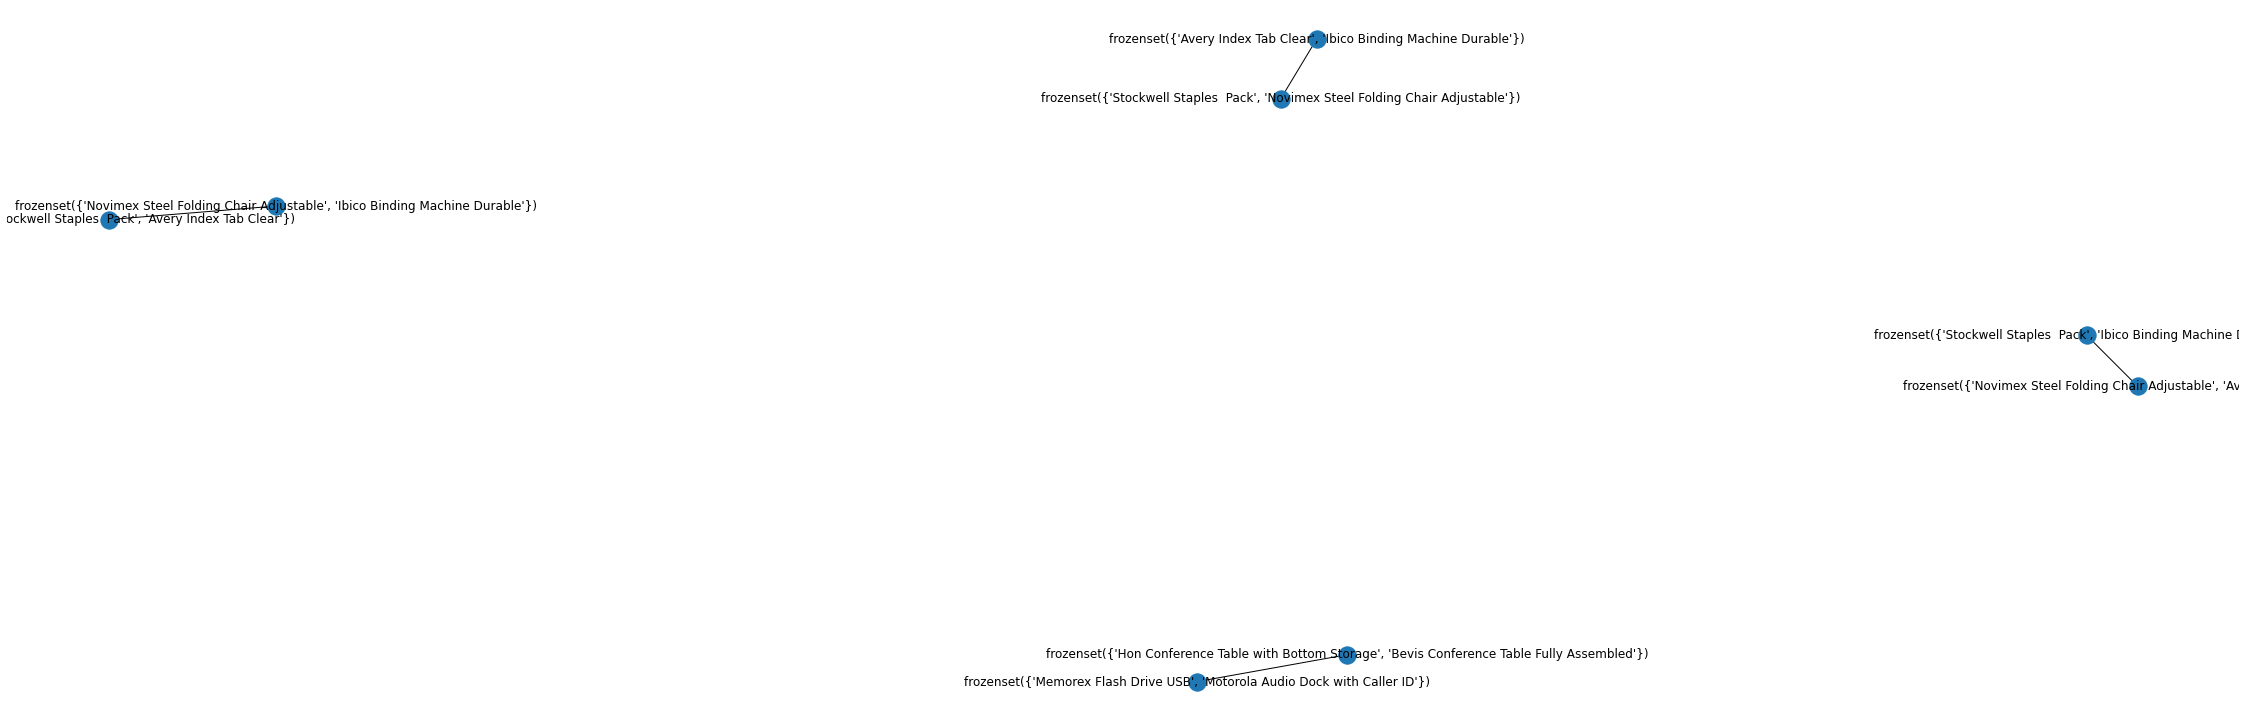

In [165]:
import networkx as nx
fig, ax=plt.subplots(figsize=(40,13))
GA=nx.from_pandas_edgelist(df_sort[1:5],source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()